Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

Load the dataset

In [3]:
df = pd.read_csv('/Users/yashikasharma/Downloads/customer_support_tickets.csv')
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


Data Preprocessing

In [4]:
# Display basic info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [5]:
df.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [6]:
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [7]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [8]:
# drop rows with missing values
df['Customer Satisfaction Rating'] = pd.to_numeric(df['Customer Satisfaction Rating'], errors='coerce')

df = df.dropna(subset=['Customer Satisfaction Rating'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2 to 8467
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     2769 non-null   int64  
 1   Customer Name                 2769 non-null   object 
 2   Customer Email                2769 non-null   object 
 3   Customer Age                  2769 non-null   int64  
 4   Customer Gender               2769 non-null   object 
 5   Product Purchased             2769 non-null   object 
 6   Date of Purchase              2769 non-null   object 
 7   Ticket Type                   2769 non-null   object 
 8   Ticket Subject                2769 non-null   object 
 9   Ticket Description            2769 non-null   object 
 10  Ticket Status                 2769 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               2769 non-null   object 
 13  Ticket C

In [9]:
df.isnull().sum()

Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64

In [10]:
# create hour and day of week columns
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')

df['response_hour'] = df['First Response Time'].dt.hour
df['response_dayofweek'] = df['First Response Time'].dt.dayofweek
df = df.drop(columns=['First Response Time'])
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,Time to Resolution,Customer Satisfaction Rating,response_hour,response_dayofweek
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 18:05:38,3.0,11,3
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 01:57:40,3.0,7,3
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 19:53:42,1.0,0,3
10,11,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,2023-05-31 23:51:49,1.0,17,3
11,12,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 09:27:51,1.0,12,3


Exploratory Data Analysis

In [11]:
#Analyze customer support ticket trends
# Identify common issues
common_issues = df['Ticket Subject'].value_counts().head(10)
print("Top 10 Common Issues:")
print(common_issues)

Top 10 Common Issues:
Ticket Subject
Network problem           201
Software bug              199
Product compatibility     195
Product recommendation    186
Product setup             183
Hardware issue            183
Delivery problem          178
Refund request            178
Battery life              173
Account access            171
Name: count, dtype: int64


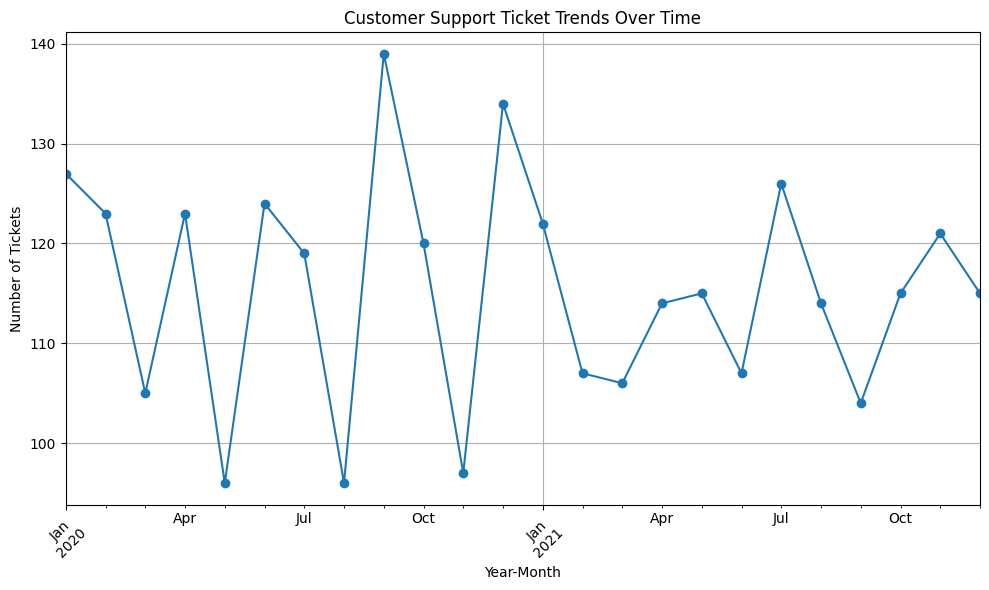

In [12]:
# Plotting ticket trends over time
df['Date of Purchase']= pd.to_datetime(df['Date of Purchase'])
df['YearMonth']= df['Date of Purchase'].dt.to_period('M')
ticket_trends = df.groupby('YearMonth').size()
plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Segment customers
# Segment based on ticket types
ticket_type_segmentation = df.groupby('Ticket Type').size()
print("\nSegmentation based on Ticket Types:")
print(ticket_type_segmentation)
# Segment based on satisfaction levels
satisfaction_segmentation = df.groupby('Customer Satisfaction Rating').size()
print("\nSegmentation based on Customer Satisfaction Levels:")
print(satisfaction_segmentation)


Segmentation based on Ticket Types:
Ticket Type
Billing inquiry         544
Cancellation request    516
Product inquiry         533
Refund request          596
Technical issue         580
dtype: int64

Segmentation based on Customer Satisfaction Levels:
Customer Satisfaction Rating
1.0    553
2.0    549
3.0    580
4.0    543
5.0    544
dtype: int64


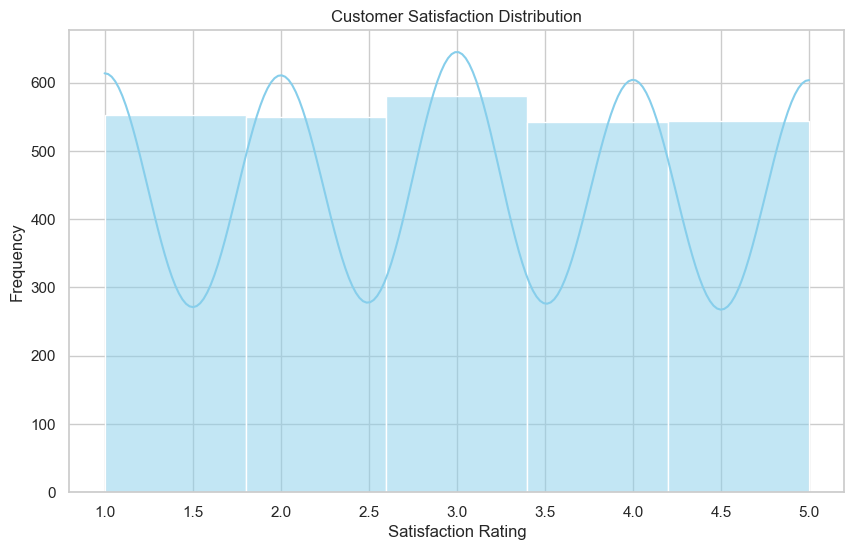

In [14]:
# Set up the plotting aesthetics
sns.set(style="whitegrid")
#Customer Satisfaction Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer Satisfaction Rating'], bins=5, kde=True, color='skyblue')
plt.title('Customer Satisfaction Distribution')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()

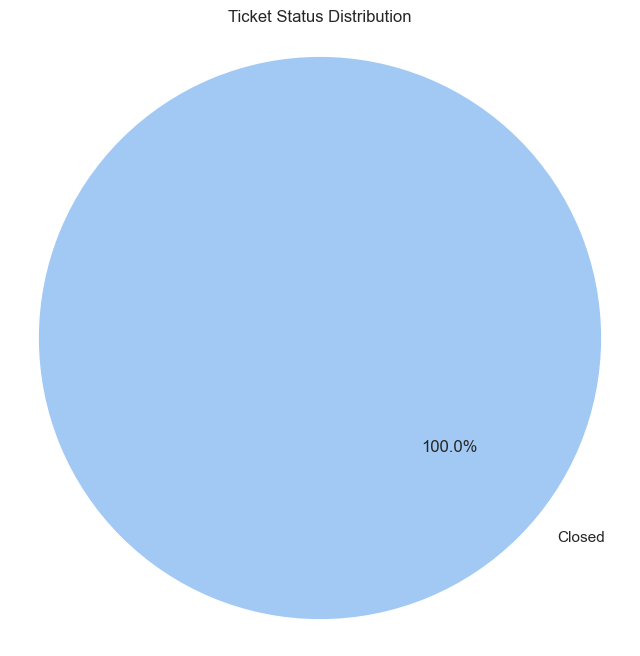

In [15]:
#Ticket Status Distribution
ticket_status_distribution = df['Ticket Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ticket_status_distribution, labels=ticket_status_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Ticket Status Distribution')
plt.axis('equal')
plt.show()

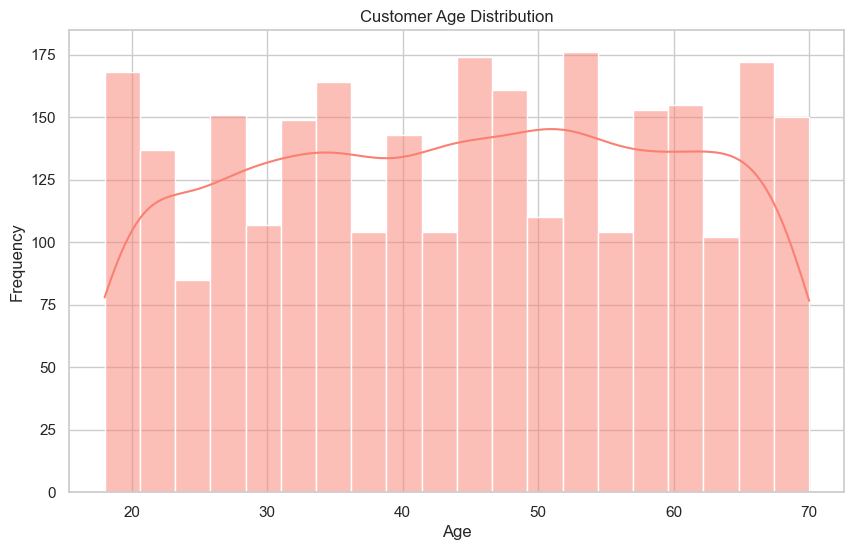

In [16]:
#Customer Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer Age'], bins=20, kde=True, color='salmon')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

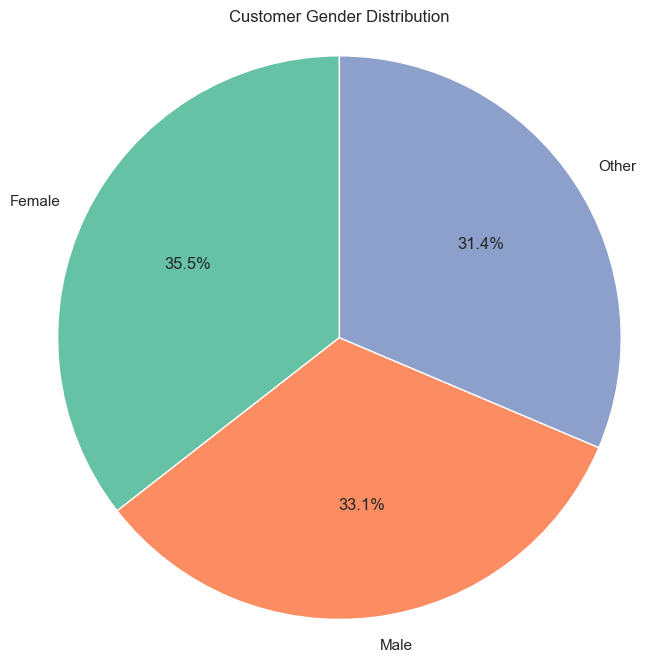

In [17]:
#Customer Gender Distribution
customer_gender_distribution = df['Customer Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(customer_gender_distribution, labels=customer_gender_distribution.index, autopct= '%1.1f%%', colors=sns.color_palette('Set2'), startangle=90)
plt.title('Customer Gender Distribution')
plt.axis('equal')
plt.show()

/var/folders/72/10skclyd6r94lwdf4pscr7p40000gn/T/ipykernel_68120/1771295878.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_channel_distribution.index, y=ticket_channel_distribution, palette='rocket')


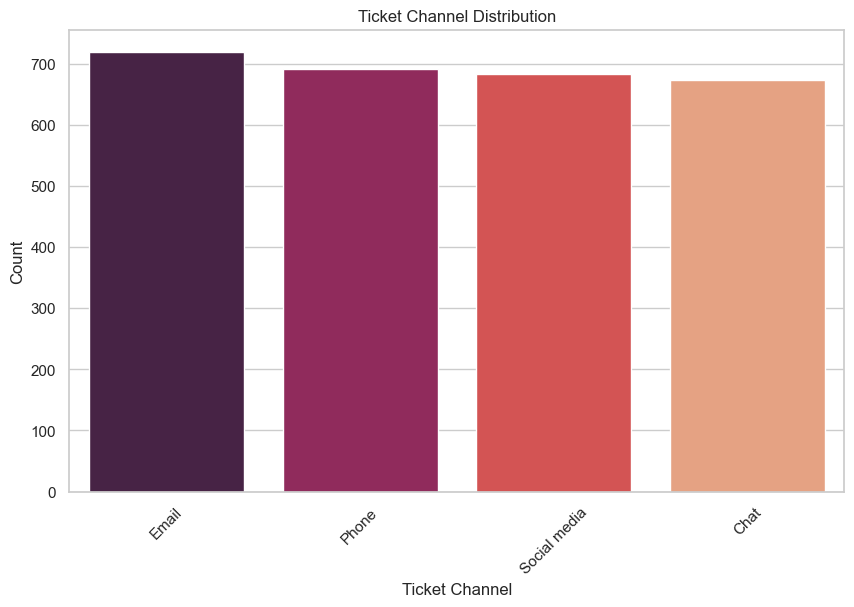

In [18]:
#Ticket Channel Distribution
plt.figure(figsize=(10, 6))
ticket_channel_distribution = df['Ticket Channel'].value_counts()
sns.barplot(x=ticket_channel_distribution.index, y=ticket_channel_distribution, palette='rocket')
plt.title('Ticket Channel Distribution')
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/var/folders/72/10skclyd6r94lwdf4pscr7p40000gn/T/ipykernel_68120/805728843.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, palette='muted', order=['Male', 'Female', 'Other'])


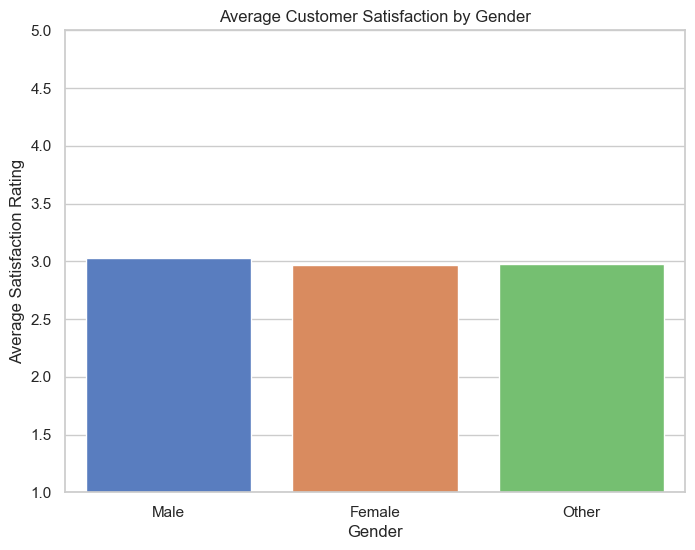

In [19]:
# Chart 1: Average Customer Satisfaction by Gender (Bar Plot)
average_satisfaction = df.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, palette='muted', order=['Male', 'Female', 'Other'])
plt.title('Average Customer Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Rating')
plt.ylim(1, 5) # Adjust y-axis limit if needed
plt.show()

/var/folders/72/10skclyd6r94lwdf4pscr7p40000gn/T/ipykernel_68120/484607143.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_purchased_distribution.index, x=product_purchased_distribution, palette='magma')


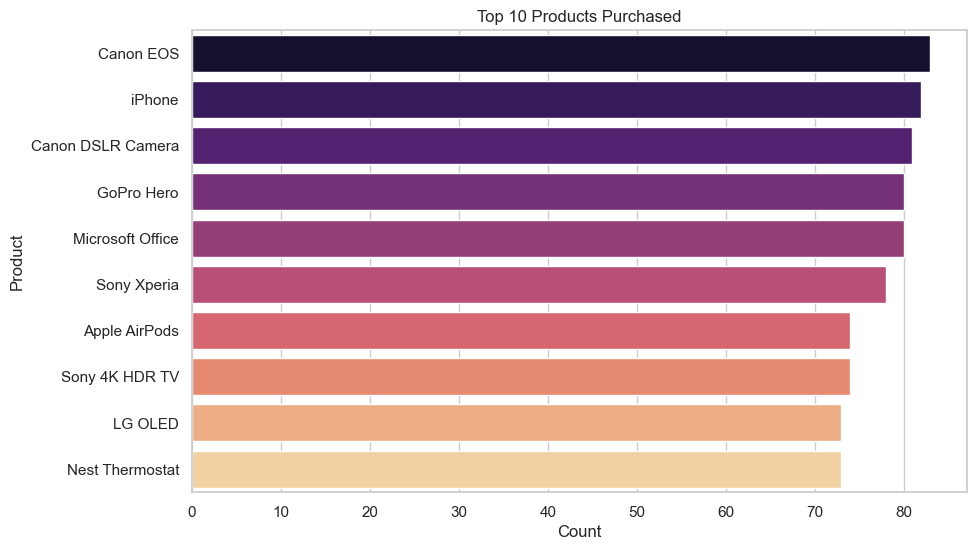

In [20]:
#Product Purchased Distribution
plt.figure(figsize=(10, 6))
product_purchased_distribution = df['Product Purchased'].value_counts().head(10)
sns.barplot(y=product_purchased_distribution.index, x=product_purchased_distribution, palette='magma')
plt.title('Top 10 Products Purchased')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()

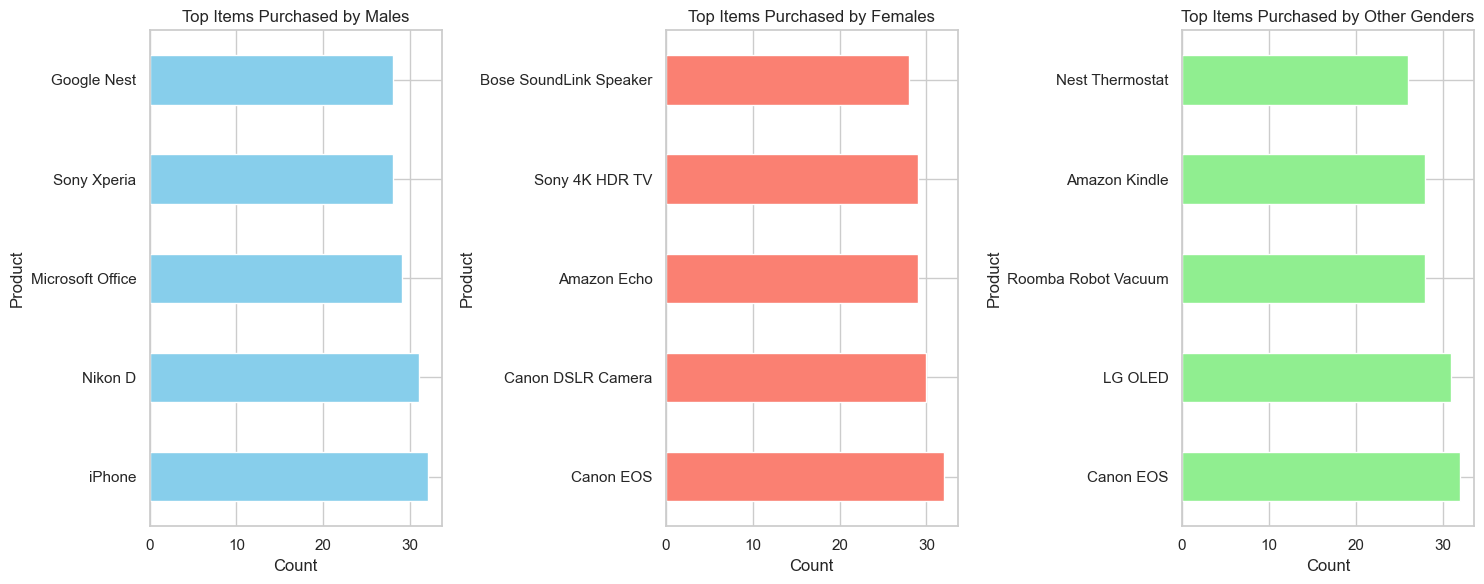

In [21]:
# Chart 2: Top Items Purchased by Gender (Horizontal Bar Chart)
plt.figure(figsize=(15, 6))
# Top Items Purchased by Males
plt.subplot(1, 3, 1)
top_items_male = df[df['Customer Gender']=='Male']['Product Purchased'].value_counts().head(5)
top_items_male.plot(kind='barh', color='skyblue')
plt.title('Top Items Purchased by Males')
plt.xlabel('Count')
plt.ylabel('Product')
# Top Items Purchased by Females
plt.subplot(1, 3, 2)
top_items_female = df[df['Customer Gender']=='Female']['Product Purchased'].value_counts().head(5)
top_items_female.plot(kind='barh', color='salmon')
plt.title('Top Items Purchased by Females')
plt.xlabel('Count')
plt.ylabel('Product')
# Top Items Purchased by Other Gender
plt.subplot(1, 3, 3)
top_items_other = df[df['Customer Gender']=='Other']['Product Purchased'].value_counts().head(5)
top_items_other.plot(kind='barh', color='lightgreen')
plt.title('Top Items Purchased by Other Genders')
plt.xlabel('Count')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

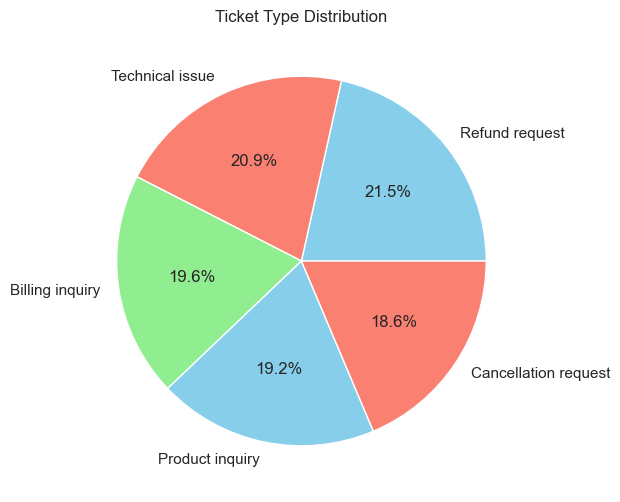

In [22]:
# Count ticket types
ticket_type_distribution = df['Ticket Type'].value_counts()
# Plot
plt.figure(figsize=(8, 6))
ticket_type_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Ticket Type Distribution')
plt.ylabel('')
plt.show()

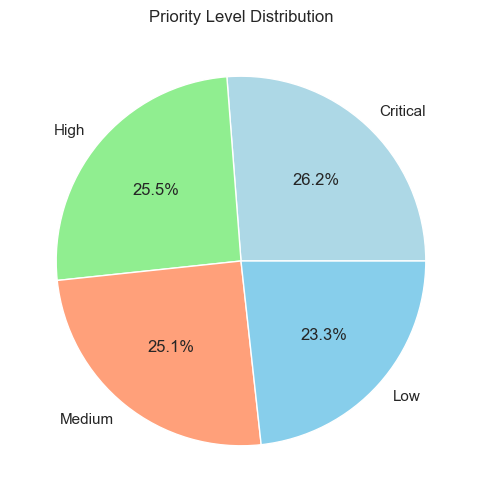

In [23]:
# Count ticket priorities
priority_distribution = df['Ticket Priority'].value_counts()
# Plot
plt.figure(figsize=(8, 6))
priority_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightsalmon', 'skyblue'])
plt.title('Priority Level Distribution')
plt.ylabel('')
plt.show()

/var/folders/72/10skclyd6r94lwdf4pscr7p40000gn/T/ipykernel_68120/4276351150.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tickets_by_age_group= df.groupby('Age Group').size()


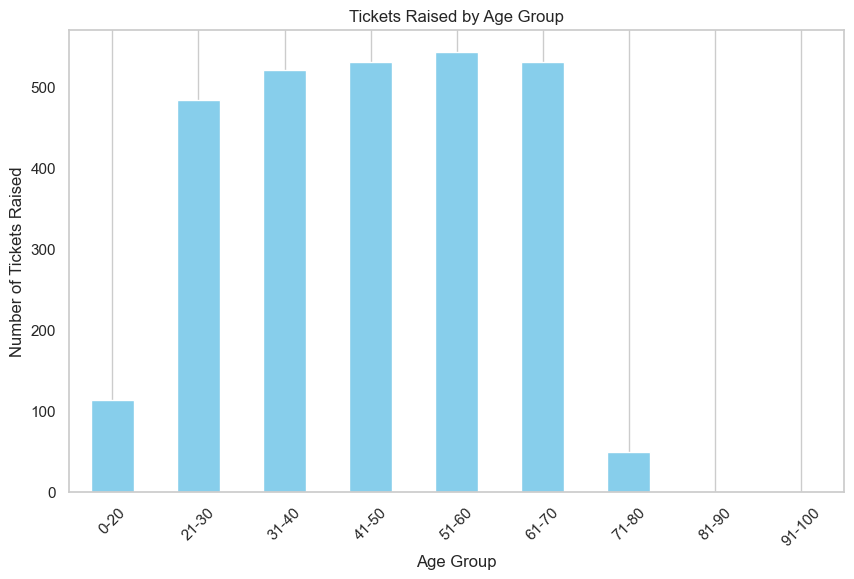

In [24]:
# Define age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
# Categorize customers into age groups
df['Age Group']= pd.cut(df['Customer Age'], bins=bins, labels=labels, right=False)
# Calculate number of tickets raised by each age group
tickets_by_age_group= df.groupby('Age Group').size()
# Plot
plt.figure(figsize=(10, 6))
tickets_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Tickets Raised by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

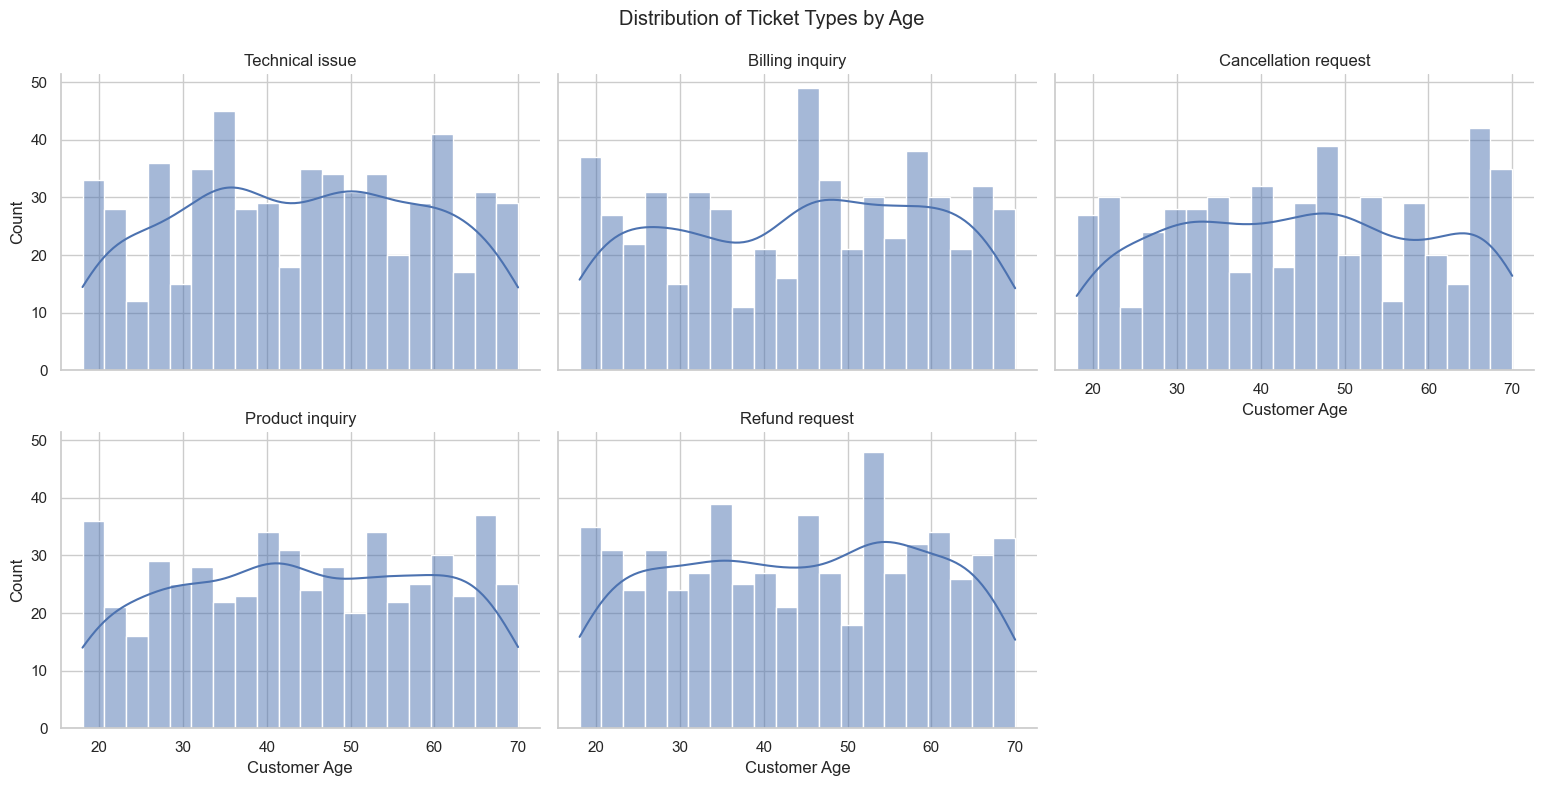

In [26]:
# Replace inf values with NaN
df.replace([np.inf,-np.inf], np.nan, inplace=True)
# Create a facet grid for each ticket type
g = sns.FacetGrid(
    df,
    col='Ticket Type',
    col_wrap=3,      # ✅ belongs here
    height=4,
    aspect=1.3
)

g.map(
    sns.histplot,
    'Customer Age',
    bins=20,
    kde=True
)

g.set_titles('{col_name}')
g.set_axis_labels('Customer Age', 'Count')
# Adjust layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Ticket Types by Age')
# Show plot
plt.show()

In [27]:
# not necessary for customer prediction
df.drop(columns=['Resolution', 'Time to Resolution', 'Ticket Status', 'Ticket ID'], inplace=True)
df.head()

,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Priority,Ticket Channel,Customer Satisfaction Rating,response_hour,response_dayofweek,YearMonth,Age Group
2,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Low,Social media,3.0,11,3,2020-07,41-50
3,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Low,Social media,3.0,7,3,2020-11,21-30
4,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Low,Email,1.0,0,3,2020-02,61-70
10,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,High,Phone,1.0,17,3,2021-01,41-50
11,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,High,Chat,1.0,12,3,2021-10,51-60


In [28]:
# Encoding categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [29]:
X = df.drop(columns=['Customer Satisfaction Rating'])
y = df['Customer Satisfaction Rating']

In [30]:
# Convert 1–5 rating into 3 meaningful classes
def map_satisfaction(x):
    if x <= 2:
        return 'Low'
    elif x == 3:
        return 'Medium'
    else:
        return 'High'

y_3class = y.apply(map_satisfaction)

In [31]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_3class, test_size = 0.3, random_state=42)

Model building

In [32]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include='object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=10,
    random_state=42,
    class_weight='balanced'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [33]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [34]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.3778580024067389
Classification Report:
               precision    recall  f1-score   support

        High       0.38      0.45      0.41       314
         Low       0.42      0.46      0.44       342
      Medium       0.19      0.09      0.12       175

    accuracy                           0.38       831
   macro avg       0.33      0.33      0.32       831
weighted avg       0.36      0.38      0.36       831

Confusion Matrix:
 [[141 142  31]
 [147 157  38]
 [ 81  78  16]]


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [36]:
# Splitting the dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.3, random_state=42)

reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=300,
        max_depth=12,
        random_state=42
    ))
])

reg_model.fit(X_train1, y_train1.astype(int))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['Customer Name', 'Customer Email', 'Customer Age', 'Customer Gender',
       'Product Purchased', 'Ticket Type', 'Ticket Subject',
       'Ticket Description', 'Ticket Priority', 'Ticket Channel'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('model',
                 RandomForestRegressor(max_depth=12, n_estimators=300,
                                       random_state=42))])

In [37]:
y_pred_reg = reg_model.predict(X_test)
y_pred_reg = y_pred_reg.round().clip(1, 5)

In [38]:
print("MAE:", mean_absolute_error(y_test1.astype(int), y_pred_reg))

MAE: 1.187725631768953


Visualization of Results

In [ ]:
rfc = pipeline.named_steps['model']
preprocessor = pipeline.named_steps['preprocessor']

In [ ]:
# Get fitted objects
preprocessor = pipeline.named_steps['preprocessor']
rfc = pipeline.named_steps['model']

# THIS LINE FIXES EVERYTHING
feature_names = preprocessor.get_feature_names_out()

In [41]:
feature_importances = pd.Series(
    rfc.feature_importances_,
    index=feature_names
).sort_values(ascending=False)

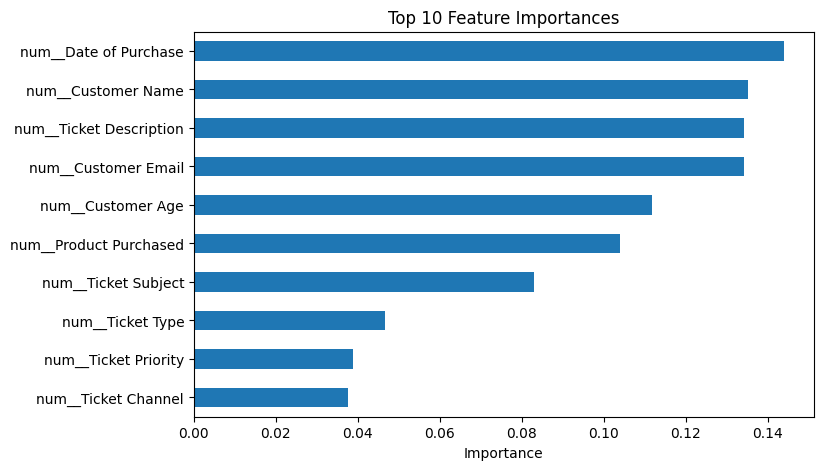

In [ ]:
feature_importances.head(10).sort_values().plot(
    kind='barh', figsize=(8, 5)
)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.show()